### TAREA 1 COSMOLOGIA
Alejandro Gutiérrez 20.677.580-7

In [1]:
import camb
import numpy as np
import matplotlib.pyplot as plt

## P6

Using CAMB obtain the matter power spectrum by using transfer functions.

In [2]:
# Parametros
H0 = 67.4 # km/s/Mpc
omega_ch2 = 0.120 # densidad fisica cold dark matter
omega_bh2 = 0.0224 # Densidad fisica bariones
tau = 0.054 # optical depth
omk = 0 # omega k

As = 2e-9
ns = 0.96
z_init = 200.0
h = 0.68

In [3]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau,omk=omk)
pars.set_dark_energy(w=-1);
pars.InitPower.set_params(As=As, ns=ns)
pars.set_matter_power(redshifts=[z_init, 0.0], kmax=1e1*pars.h)
results = camb.get_results(pars)

In [4]:
trans = results.get_matter_transfer_data()
kh = trans.transfer_data[camb.model.Transfer_kh - 1, :, 0]
T_b = trans.transfer_data[camb.model.Transfer_b - 1, :, 0]
hubble_units = True
log_interp = True
pki_b = camb.get_matter_power_interpolator(pars, zmin=0, zmax=2*z_init, kmax=1e1*results.Params.h,
                                      hubble_units=hubble_units, k_per_logint=50,
                                      var1=camb.model.Transfer_b, var2=camb.model.Transfer_b, log_interp=log_interp,
                                      nonlinear=False)
y1_b = pars.InitPower.As*(kh/pars.InitPower.pivot_scalar*pars.h)**pars.InitPower.ns*T_b**2


Text(0.5, 0, '$k/h [{\\rm Mpc}^{-1}]$')

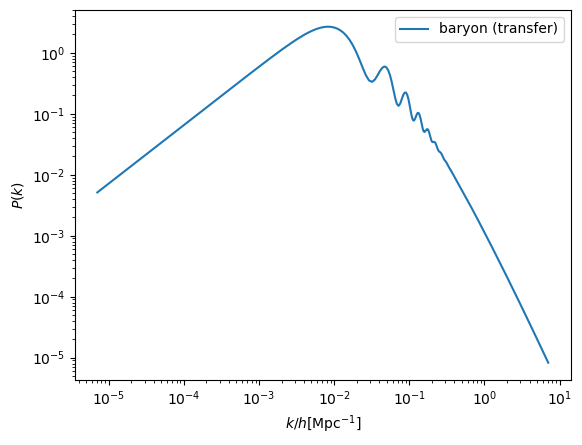

In [5]:
plt.loglog(kh*pars.h, y1_b, c='C0', label='baryon (transfer)')
plt.legend()
plt.ylabel(r'$P(k)$')
plt.xlabel(r'$k/h [{\rm Mpc}^{-1}]$')